<img src="https://github.com/iitmcvg/Content/blob/master/avatar.png?raw=true" alt="Logo" width="300" height="300"/>

#                        Computer Vision and Intelligence Group, CFI- IIT Madras

## Depth Estimation using Computer Vision
**What you'll learn: Stereo Matching**

**What you will achieve today: Write a python program that, given two rectified stereo images as input, will give an output of the disparity and depth maps.**

**Download this notebook from our Github repository: https://github.com/iitmcvg/Content**


## Stereo Matching
A technique used to find correspondences between two images of the same scene from different view points.

### Where is it used?

One of the main applications of Stereo Matching is used to estimate depth. We can match certain parts/features of a pair of stereo images and obtain depth of each pixel on the image using the disparity.   

***Try this activity:*** Look at forward with your left eye only. Now close your left eye and observe your surroundings with your right eye. Whatever you had been observing would have shifted slightly.   

As you observed now, this disparity in the images is helpful for obtaining depth by performing Stereo Matching.  
- We use Stereo Matching to estimate depth when we see. Each one of our eyes give us two different views (the images obtained by each eye is slightly shifted).
- In the screening of 3D movies, two Stereo Images are projected onto the screen, which when viewed with 3D glasses, gives us the perception of depth.
- Smart robots use stereo matching techniques to estimate the depth map of their view. It helps them reconstruct the entire 3D map so they can move around.

## Understanding the Problem Statement

Given two rectified stereo-images, we need to estimate the depth of different objects in the images.   

Let us try to understand the different parts of the above problem statement.   
 - Stereo-images refer to the two views of the same scene obtained from two different viewpoints
 - We are considering rectified images to simplify the problem. Rectified images are those images where there is no geometric distortion between images and that there is no relative rotation w.r.t. to both cameras

In short what we have is two images of a single scene with some horizontal displacement with all other aspects constant.

### Projecting an Object to the two Image Planes
![alt text](./Nb_Imgs/disparity.png)

We have an object `X` and its projection in both cameras (`x` and `x'`). By knowing the correspondent points in both images, we can calculate the disparity, which will give us the difference between the location of the object from the left image to the right image.  
Disparity of a pixel is defined by how much a pixel has moved from one image to another.
The equation used for this calculation below. When objects are close to the camera this difference is big, when objects are far this difference is small.

\begin{equation}
disparity = x - x' = {Bf \over Z}
\end{equation}

When objects are close to the camera this difference is big, when objects are far this difference is small. This is analogous to the scenery we observe while travelling by train or car, things near us seem to go out of our view very quickly compared to objects far away.

### Some problems faced in stereo matching

The above theory might be really intuitive, however to find the correspondent pixels is a challenge. 
 1. The RGB values of the pixel under consideration might be the same for many other pixels along that line. 
 2. In addition the stereo images might give different slightly different values for the same point due to occlusion, something similar to the picture below.
![epipolar geometry](./Nb_Imgs/Epipolar.png)

In the above picture, we can observe both the balls separately from one view, but in the other view both the balls are in the same line.    
This eliminates the possibility of matching each pixel in one image to one pixel in the other image. So we try to consider the surrounding pixels also to identify the correspondences.  We implement some techniques to solve these issues and to simplify the problem.

To find the correspondent points we are going to use the block matching algorithm. The block matching algorithm will get a region in the first image and try to find the most similar region in the second image using some metric. Some of the common metrics are Sum of Abolute Differences, Sum of Squares of Differences.   

__Let's get our hands dirty by obtaining the depth map implementing the ideas you've learnt until now.__

In [1]:
# Import the relevant packages that are important for working with images
# You might have encountered them if you have attended the previous session
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Displaying images using pyplot in matplotlib
pyplot in matplotlib plots the image according the RGB values or grayscale values. The color space used by pyplot is RGB but the color space used by openCV is BGR by default. So while plotting images using pyplot we need to change the color space of the image to realise the correct output.

In [2]:
# EXERCISE: Read the two stereo images and display them using matplotlib.pyplot
# Use the functions you had learnt in the previous session



# OpenCV reads images in BGR
# matplotlib.pyplot considers images in RGB



# Create grayscale copies of the images as we'll require them later


# Displaying the images


# The next cell contains a method in which the above exercise can be solved

## Block Comparison
The two stereo images we are using are from the “Cones” dataset created by Daniel Scharstein, Alexander Vandenberg-Rodes, and Rick Szeliski. Their dataset is available here: http://vision.middlebury.edu/stereo/data/scenes2003/

Now let us look at the block matching algorithm in detail and try to implement it.

A block is a `n x n` slice of an image that can be slid across the other image to find the closest match.

For example, we’ll take the region of pixels within the black box in the left image:
![block left image](./Nb_Imgs/left_wtemplate_crop.png)

And find the closest matching block in the right image:
![block right image](./Nb_Imgs/right_wsearch_crop.png)

What is our similarity metric for finding the “closest matching block”? It’s simpler than you might think, it’s a simple operation called "sum of absolute differences" or "SAD".

To compute the sum of absolute differences between the template and a block, we subtract each pixel in the template from the corresponding pixel in the block and take the absolute value of the differences. Then we sum up all of these differences and this gives a single value that roughly measures the similarity between the two image patches. A lower value means the patches are more similar.

![SAD](./Nb_Imgs/sadillustration.png)

To find the "most similar" block to the template, we compute the SAD values between the template and each block in the search region, then choose the block with the lowest SAD value.

Note that we're only searching horizontally for matching blocks and not vertically. This is because we are working with images which have already been "rectified". Image rectification is important because it ensures that we only have to search horizontally for matching blocks, and not vertically. That is, a feature in the left image will be in the same pixel row in the right image.

The block-matching algorithm requires us to specify how far away from the template location we want to search. This is based on the maximum disparity you expect to find in your images.

### In short, two important parameters are required for Stereo Block matching
 1. **numDisparities** - the disparity search range. For each pixel algorithm will find the best disparity from 0 (default minimum disparity) to numDisparities. The search range can then be shifted by changing the minimum disparity.
 2. **blockSize** - the linear size of the blocks compared by the algorithm. The size should be odd (as the block is centered at the current pixel). Larger block size implies smoother, though less accurate disparity map. Smaller block size gives more detailed disparity map, but there is higher chance for algorithm to find a wrong correspondence.

### Code for Block Matching
For simplicity in comparision and faster search, we convert the images to grayscale as we have to work with only one number instead of three.

In [4]:
# EXERCISE: Try to create your own block matching algorithm based on the information above

# Define the size of the block and the maximum disparities
# Choose one of the images as a reference appropriately 
# With this reference, identify the disaprities of each pixel
# Create a Numpy array with the disaprity values of each pixel in the reference image

def get_disparity(right_image, left_image, block_size, numDisparity):
    '''
    params:
        left_image -> Numpy Array: The view from the left side/camera
        right_image -> Numpy Array: The view from the right side/camera
        block_size -> Integer: The side length of the block in number of pixels
        numDisparity-> Integer: The maximum disaprity that is expected from the images usually in multiples of 8
    return:
        A Numpy Array with the disaprities of each pixel in the reference image
    '''
    
    
    
    
    
    return (disparity_map)

# you can find a possible solution in the following cell

### Built-in OpenCV function to generate depth maps
The built-in openCV function to generate depth maps by stereo matching. It extracts certain features and matches them which reduces the comutational complexity. Thus this function generates the disparity maps at a faster rate.

In [6]:
# calling the cv2 function that computes disparity

stereo = cv2.StereoBM_create(numDisparities=64, blockSize=5) # Creates a stereo block matching object
disparity_builtin= stereo.compute(grayL,grayR) # Generates the disparity map

Our function


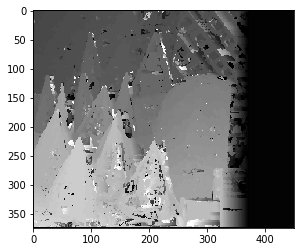

Built-in OpenCV function


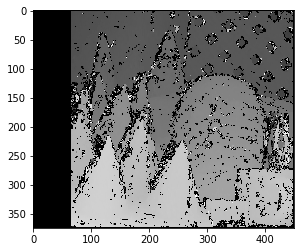

Ground Truth


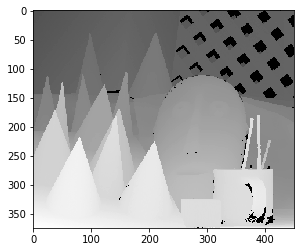

In [7]:
# calling our function to compute the disparity map
disparity = get_disparity(grayR, grayL, 5, 64)

# disparity map generated by our function
print("Our function")
plt.imshow(disparity, 'gray')
plt.show()

# disparity map generated by the builtin function
print("Built-in OpenCV function")
plt.imshow(disparity_builtin,'gray')
plt.show()

# ground truth
print("Ground Truth")
GT = cv2.imread("./Task_Imgs/GroundTruth.png", 0)
plt.imshow(GT, 'gray')
plt.show()

## What is SLAM and How does it Work?
Simultaneous localization and mapping (SLAM) is the computational problem of constructing or updating a map of an unknown environment while simultaneously keeping track of an agent's location within it. This allows for all sorts of “smart” bots, such as those constrained to perform a given task. SLAM is usually known as an egg-or-chicken problem - since we need a precise map to localise bots and a precise localisations to create a map - and is usually classified as a hard problem in the field of computer vision. Our main inspiration comes from the demonstrated work at CVPR 2017 by Tateno, Tombari et all. The original paper may be found here: https://arxiv.org/abs/1704.03489

<img src="./Nb_Imgs/SLAM.jpeg" alt="SLAM Flow" />